## Import Libraries

In [2]:
import numpy  as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [3]:
# Read data

colnames = ['userID', 'itemID', 'rating', 'timestamp']
ratings_df = pd.read_csv('ratings_Electronics.csv', names=colnames, header=None)

In [4]:
ratings_df.head()

,userID,itemID,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
# Drop Timestamp column

ratings_df.drop(labels='timestamp', axis=1, inplace=True)

In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID    object
itemID    object
rating    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


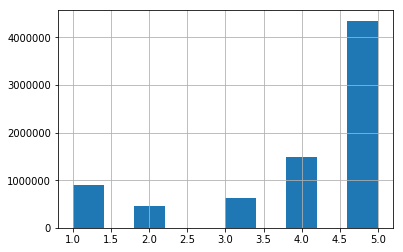

In [7]:
# Histogram of ratings

ratings_df['rating'].hist()

### A lot of the products have been rated 5 stars, number of which is almost as 3-4 times as other ratings.

## 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [8]:
# Check unique entries for userID column

usr_rating_ct = ratings_df['userID'].value_counts()
usr_rating_ct

A5JLAU2ARJ0BO            520
ADLVFFE4VBT8             501
A3OXHLG6DIBRW8           498
A6FIAB28IS79             431
A680RUE1FDO8B            406
A1ODOGXEYECQQ8           380
A36K2N527TXXJN           314
A2AY4YUOX2N1BQ           311
AWPODHOB4GFWL            308
A25C2M3QF9G7OQ           296
ARBKYIVNYWK3C            296
A22CW0ZHY3NJH8           292
A3EXWV8FNSSFL6           282
A38RMU1Y5TDP9            282
A3LGT6UZL99IW1           279
A2NOW4U7W3F7RI           277
A23GFTVIETX7DS           270
A3PD8JD9L4WEII           266
A17BUUBOU0598B           261
A3AYSYSLHU26U9           257
A2XRMQA6PJ5ZJ8           253
A12DQZKRKTNF5E           252
A231WM2Z2JL0U3           252
A1UQBFCERIP7VJ           247
AGVWTYW0ULXHT            244
A203OCQQ12MAVT           240
AEJAGHLC675A7            239
A2NYK9KWFMJV4Y           238
A3A4ZAIBQWKOZS           236
A2UOHALGF2X77Q           227
                        ... 
A2HNSX6EMUWMP9             1
AV5013VIUWHSK              1
AIGSDP3DVW129              1
A3MXUHS822VU1W

In [9]:
#Filter users who have given atleast 50 ratings

ratings_df = ratings_df[ratings_df.userID.isin(usr_rating_ct[usr_rating_ct>50].index)]
ratings_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
AWPN47SSWK1JV      51
A3MV1KKHX51FYT     51
AYGEKID3G7DPW      51
AFM2J3HJNPIHV      51
A3QDMDSANPYGUX     51
A32AK8FOAZEPE2     51
A2XRIU3SOYZ0ZC     51
A303SNZ4AR7TDQ     51
A1HYH206E18XVC     51
A12LH2100CKQO      51
A3O5ASFUXC32UA     51
A328GLDSDNFYII     51
A3BI8BKIHESDNQ     51
A12ANFNOSMW5VD     51
A1SC5OXLQN

In [11]:
# Check the reduce shape

ratings_df.shape

(122171, 3)

In [14]:
len(ratings_df['userID'].unique().tolist())

1466

In [15]:
len(ratings_df['itemID'].unique().tolist())

47155

In [16]:
# Similarity matrix size for item-item
print(47155*47155)

2223594025


### We have reduced our input data from 7.8 M to 1.2 M observations

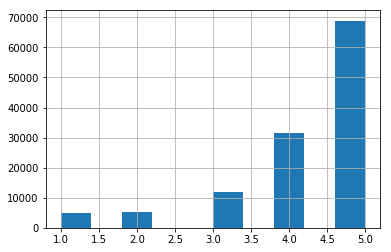

In [33]:
ratings_df['rating'].hist()

### Now we can see that we have number of products rated as 4 stars as much as half of the ones rated as 5 stars compared to one-third earlier. Which means we have removed a lot of users who bought minimal products and rated them as 5 stars. Which is good in a way because we would like to build our Recommender Systems based on reviews given by experienced users who have been buying and giving genuine reviews over various products over a long period of time.

## 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

### Split has been done independently for each model in 4. and 5.

## 4. Build Popularity Recommender model.

In [34]:
# Define the Popularity Recommender Class

    #Create the popularity based recommender system model
def create_recommendation(train_data, user_id, item_id, n):
    

    #Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    train_data_grouped.rename(columns = {user_id: 'Score'},inplace=True)

    #Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values('Score', ascending = False)

    #Generate a recommendation rank based upon score
    train_data_sort['Rank'] = train_data_sort['Score'].rank(ascending=0, method='first')

    #Get the top 10 recommendations
    popularity_recommendations = train_data_sort.head(n)

    return popularity_recommendations

    #Use the popularity based recommender system model to
    #make recommendations
def recommend(popularity_recommendations, user_id):    
    user_recommendations = popularity_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['user_id'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations


In [35]:
# Split into train and test data

train_set, test_set = train_test_split(ratings_df, test_size = 0.20, random_state=0)

In [36]:
# Create Recommendations

popular_reco = create_recommendation(train_set, 'userID', 'itemID', 5)

In [37]:
popular_reco

,itemID,Score,Rank
32948,B0088CJT4U,169,1.0
20944,B003ES5ZUU,148,2.0
9278,B000N99BBC,127,3.0
32319,B007WTAJTO,118,4.0
32626,B00829TIEK,116,5.0


In [38]:
# Showing recommendations for 2nd user in test set

user_reco = recommend(popular_reco, test_set.iloc[1]['userID'])
user_reco

,user_id,itemID,Score,Rank
32948,AS269J1OGZT1V,B0088CJT4U,169,1.0
20944,AS269J1OGZT1V,B003ES5ZUU,148,2.0
9278,AS269J1OGZT1V,B000N99BBC,127,3.0
32319,AS269J1OGZT1V,B007WTAJTO,118,4.0
32626,AS269J1OGZT1V,B00829TIEK,116,5.0


In [39]:
# Showing recommendations for 4th user in test set

user_reco = recommend(popular_reco, test_set.iloc[3]['userID'])
user_reco

,user_id,itemID,Score,Rank
32948,A2J7FHZFKOKGZ6,B0088CJT4U,169,1.0
20944,A2J7FHZFKOKGZ6,B003ES5ZUU,148,2.0
9278,A2J7FHZFKOKGZ6,B000N99BBC,127,3.0
32319,A2J7FHZFKOKGZ6,B007WTAJTO,118,4.0
32626,A2J7FHZFKOKGZ6,B00829TIEK,116,5.0


### As this is popularity based Recommendation System, it should show the same recommendations for every user i.e the most popular products.

### Now lets do some predictions on the test data and evaluate



In [40]:
# So, for each unique itemID in the train set, get the median rating and round it to the nearest integer

train_data_grouped = train_set.groupby(['itemID']).agg({'rating': 'median'}).reset_index()
train_data_grouped['rating'] = train_data_grouped['rating'].round(0).astype(int)
train_data_grouped.rename(columns={"rating": "median_rating"}, inplace=True)
train_data_grouped.head()

,itemID,median_rating
0,0594481813,3
1,0970407998,2
2,0972683275,5
3,1400501466,2
4,1400501520,5


In [41]:
# Now do a left merge of test data with the predicted avg rating data on itemID column

test_merged = pd.merge(test_set, train_data_grouped, on='itemID', how='left')
test_merged.head()

,userID,itemID,rating,median_rating
0,A18A5VSD0IPN14,B00ISH33JW,5.0,NaN
1,AS269J1OGZT1V,B003RRFWRY,5.0,5.0
2,A3QNQQKJTL76H0,B002HWRJXU,2.0,NaN
3,A2J7FHZFKOKGZ6,B004Z24L2W,4.0,NaN
4,A3MUSWDCTZINQZ,B001TOD7ME,5.0,5.0


### So the itemID in test data which didnot exist in train data, have no avg rating and hence nan. In this case, replace them to the actual rating by the user

In [42]:

null_id = test_merged.median_rating.isnull()
user_ratings = test_merged[null_id]['rating']
test_merged['median_rating'].fillna(user_ratings, inplace=True)
test_merged.head()

,userID,itemID,rating,median_rating
0,A18A5VSD0IPN14,B00ISH33JW,5.0,5.0
1,AS269J1OGZT1V,B003RRFWRY,5.0,5.0
2,A3QNQQKJTL76H0,B002HWRJXU,2.0,2.0
3,A2J7FHZFKOKGZ6,B004Z24L2W,4.0,4.0
4,A3MUSWDCTZINQZ,B001TOD7ME,5.0,5.0


In [43]:
# Now calculate RMSE

predicted = test_merged.median_rating.values
actual = test_set.rating.values
rmse = np.sqrt(mean_squared_error(actual, predicted))
rmse

0.9681863966772439

## 5. Build, Evaluate and Recommend using Collaborative Filtering model.

### Will be using Surprise Library to build this model with two different configurations : Similarity Measure and Baseline Estimate. GridSearchCV will be used to get the best estimator in both cases and make the final predictions.

In [44]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import NormalPredictor
from surprise.model_selection import train_test_split as surprise_train_test_split
3
from surprise.model_selection import GridSearchCV

In [45]:
# Define Reader
reader = Reader(rating_scale=(1, 5))

In [46]:
# Load data from Pandas dataframe
ratings_data = Dataset.load_from_df(ratings_df[["userID", "itemID", "rating"]], reader)

In [47]:
# Build Training and Test Set
trainset, testset = surprise_train_test_split(ratings_data, test_size=.3)

### Similarity Measure Algorithm - KNN with Means

In [48]:
# Build and fit model using GridSearchCV

sim_options = {
    "name": ["msd", "cosine", "pearson_baseline"],
    "min_support": [5, 15, 35, 55, 75, 95]
}

param_grid = {"sim_options": sim_options}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3, n_jobs=-1)
gs.fit(ratings_data)


In [49]:
# Print results

print(gs.best_estimator["rmse"])
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0251747000429734
{'sim_options': {'name': 'msd', 'min_support': 35, 'user_based': True}}


In [50]:
# Use the best estimator and evaluate RMSE

algo = gs.best_estimator['rmse']
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0284


1.0283584165350814

### Baseline Estimates Algorithm - Baseline Only

In [51]:
# Build and fit model using GridSearchCV

bsl_options = {'method': ['als'],
               'n_epochs': [3, 5, 10],
               'reg_u': [12, 15, 18],
               'reg_i': [5, 10, 15]
               }

param_grid = {"bsl_options": bsl_options}
gs = GridSearchCV(BaselineOnly, param_grid, measures=["rmse", "mae"], cv=3, n_jobs=-1)
gs.fit(ratings_data)

In [52]:
# Print results

print(gs.best_estimator["rmse"])
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9770828276321234
{'bsl_options': {'method': 'als', 'n_epochs': 3, 'reg_u': 12, 'reg_i': 5}}


In [53]:
# Use the best estimator and evaluate RMSE

algo = gs.best_estimator['rmse']
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions, verbose=False)

Estimating biases using als...


0.9774470269606021

### Baseline Only method provided the lowest RMSE compared to KNN with means.

### Inspect our best and worst predictions

In [54]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [55]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A1E55W6ES0FY17,B000V1PB0M,5.0,3.730002,{'was_impossible': False},58,0,1.269998
1,A6VXZ1EEPRTLV,B000050MNA,5.0,4.007121,{'was_impossible': False},117,0,0.992879
2,A87N6UTYA6NOB,B004SBBD8U,5.0,4.446348,{'was_impossible': False},70,30,0.553652
3,A324X7RVDAV3FT,B00009R6H2,5.0,4.326316,{'was_impossible': False},39,1,0.673684
4,AWZR0O65DL2Q,B00ASWXJ2G,5.0,4.231960,{'was_impossible': False},48,0,0.768040


In [56]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [57]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
20586,AZMY6E8B52L2T,B003ES5ZUU,5.0,5.0,{'was_impossible': False},131,129,0.0
29865,A2HDTOF8222KN3,B007BYLO4E,5.0,5.0,{'was_impossible': False},53,2,0.0
19156,A2LTYEYGKBYXRR,B00ISFNSBW,5.0,5.0,{'was_impossible': False},56,10,0.0
30832,A3094EPI56GKZ6,B00FNPD1OY,5.0,5.0,{'was_impossible': False},54,18,0.0
27378,A1QRST0A3IQIEF,B008MDSWI4,5.0,5.0,{'was_impossible': False},44,13,0.0
32717,A2NOW4U7W3F7RI,B0051BG48U,5.0,5.0,{'was_impossible': False},191,4,0.0
3335,AO09RWV40IX78,B00BOHNYU6,5.0,5.0,{'was_impossible': False},44,45,0.0
12992,A9BWUH9XKZ2DQ,B007WTAJTO,5.0,5.0,{'was_impossible': False},38,111,0.0
7319,A38Z6QG6988WS7,B003FVVMS0,5.0,5.0,{'was_impossible': False},41,18,0.0
27024,A1MFPAM9TTRTXN,B007WTAJTO,5.0,5.0,{'was_impossible': False},40,111,0.0


### We can see the range of users who have rated specific product (Ui) varies between 7 and 102, and the algorithm was able to correctly predict the estimated rating.

In [58]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
22832,A1ZBEIL78MLR9Z,B00D856NOG,1.0,4.825273,{'was_impossible': False},38,11,3.825273
2418,AO09RWV40IX78,B0079KZZKO,1.0,4.829800,{'was_impossible': False},44,1,3.829800
36155,ACQYIC13JXAOI,B00IVPU7DG,1.0,4.884138,{'was_impossible': False},53,8,3.884138
17182,A2D0CO1OA6DSWY,B004N625B4,1.0,4.907908,{'was_impossible': False},38,13,3.907908
19195,A17NVM7IAPF2NS,B004N625B4,1.0,4.944288,{'was_impossible': False},44,13,3.944288
19334,A6KL17KKN0A5L,B000JE7GPY,1.0,4.965046,{'was_impossible': False},35,28,3.965046
20100,A1H55L0BLPCWYF,B0002L5R78,1.0,4.978070,{'was_impossible': False},33,49,3.978070
34799,AHF4I1FSIHABC,B006TT91TW,1.0,4.999119,{'was_impossible': False},51,21,3.999119
15644,A9BWUH9XKZ2DQ,B00006RVPW,1.0,5.000000,{'was_impossible': False},38,22,4.000000
36528,A3TA1UJWRJF9NC,B000MX48VM,1.0,5.000000,{'was_impossible': False},40,28,4.000000


### The last 2 predictions are totally off. Should have been predicted to be 1.0 instead of 5.0 Lets investigate whats going on. 

In [59]:
# Describing the ratings received for the product B001TH7GUU

ratings_df.loc[ratings_df['itemID'] == 'B001TH7GUU']['rating'].describe()

count    74.000000
mean      4.864865
std       0.531844
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

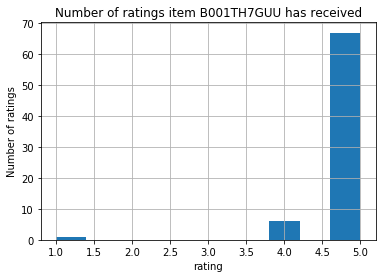

In [60]:
# Plot the distribution of ratings for the product B001TH7GUU

ratings_df.loc[ratings_df['itemID'] == 'B001TH7GUU']['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings item B001TH7GUU has received')
plt.show();

### As can be seen, majority of users have rated it 5 with a minority rated 1.0 and so the predicted rating was 5.0

### Lets recommended top 5 products to each user based on his/her habits.

In [61]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [62]:
# Get top 5 recommendations
top_n = get_top_n(predictions, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A1E55W6ES0FY17 ['B00005114Z', 'B003TLAMV4', 'B003BKW2K2', 'B00EOI2SYK', 'B000CR78C4']
A6VXZ1EEPRTLV ['B000UHQVOW', 'B00CSDMWGW', 'B0062EUE54', 'B00009R89C', 'B0046TDL9S']
A87N6UTYA6NOB ['B0013AV4M4', 'B009SYZ8OC', 'B000OYHU1Y', 'B004SBBD8U', 'B0002A9RFM']
A324X7RVDAV3FT ['B001ENW61I', 'B00005LEN4', 'B002JCSV8U', 'B001BTG3OQ', 'B0000BZL28']
AWZR0O65DL2Q ['B0012IJYZQ', 'B000MT4JTC', 'B0014L4ZKK', 'B002SXMRU8', 'B000067O5G']
A3JUHP1E3WUHEA ['B0033PRWSW', 'B007FGYZFI', 'B002K9IHGI', 'B0035FZ12O', 'B001FN3ZRQ']
A6FIAB28IS79 ['B000FQ2JLW', 'B00029U1DK', 'B003ZSHNGS', 'B0001DBEM4', 'B001FA1NZK']
A38NELQT98S4H8 ['B00DT04I9W', 'B005EOWBKE', 'B005E5TRIW', 'B0034CL2ZI', 'B000TS7I6C']
A28525P0S5ZVJ3 ['B000FITKK8', 'B009PJ3AZ4', 'B001954DPI', 'B005DKZTMG', 'B000S6AKQ0']
A10Y058K7B96C6 ['B000N99BBC', 'B001QUA6RA', 'B0019EHU8G', 'B001I45T9O', 'B004CLYEDC']
A1V3TRGWOMA8LC ['B004ELA0SS', 'B00IVFDZBC', 'B0082E9K7U', 'B0041D81WQ', 'B002Y6CJJ8']
A1S27P7KJO9I96 ['B00D429Y12', 'B001BM5XB2', 'B000R805L4', 'B

AA95DWUI3ODU ['B003DZ122O', 'B003WOLM62', 'B006P4DI5E', 'B00F3SOHNU', 'B00746LVOM']
A11ULAZ4B5ZXC8 ['B00AYQ433U', 'B00DR0RBV6', 'B00BK9WSLO', 'B002B8WVVU', 'B00481KO30']
AMVXR3NPL0GWX ['B007R5YDYA', 'B000AZ57M6', 'B003VANO7C', 'B0019CSVMW', 'B001E1Y5O6']
A18L9A64XNGVGU ['B0052SCU8U', 'B003VANO7C', 'B00630WKGI', 'B003S6ID20', 'B0042SXZFS']
A10O7THJ2O20AG ['B00A83I8G2', 'B004LSNF04', 'B0002D6QJO', 'B000QUUFRW', 'B00062UKIY']
AQCJWSMSURQI2 ['B003CFATT2', 'B004CLYEDC', 'B00634PLTW', 'B00ITI058W', 'B00J238GV6']
A2NOIWPJDD7WIQ ['B009USAJCC', 'B004286VMW', 'B000HJPK2C', 'B000O161X0', 'B0063K4NN6']
A1MNN0ZMHYPJDU ['B001DBF07I', 'B00B588HY2', 'B001G70M6S', 'B007BXD6DW', 'B00BJNHGRM']
A3VONQL7YW8UPM ['B0087NZ31S', 'B0043EV20Q', 'B008LCYIEI', 'B00FG7MVJU', 'B001L6OVZM']
A359MYLPLEOF7N ['B0056BPUQC', 'B0002E51CQ', 'B00009ZWC8', 'B006WHPQD6', 'B00CYLU0SK']
A1WG97A0EFHYXN ['B001N6W5GC', 'B00FW5IWK8', 'B0012Y0QT8', 'B005CYXW7M', 'B00C13194A']
A2BIJMB2BITQUM ['B0043WJRRS', 'B00D6XW62I', 'B0013FRNKG', 

## 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
## 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

### Evaluation and Recommendations have been implemented already in 4. and 5. 

## 8. Summarise your insights.

### 1. Popularity based RS are the simplest RS that can be implemented and works great if a new user joins in and gets recommended the most popular products but user experience cannot be customized even though we know user's behaviour.
### 2. Collaborative filtering takes care of the demerit of popularity based RS by customizing the user experience based on user-user or item-item similarity but again it would fail to recommend in the case a new user joins in or a new product is added

### 3. So, we can use these systems complementarily to minimize the shortcomings of each system.